<a href="https://colab.research.google.com/github/focussed/etivity1/blob/master/Etivity3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etivity 3
## Best k Means value for the loans dataset



## Evaluation of other clustering algorithms
The nominations for best alternative clustering algorithm are:


1.   Means shifting clustering
This works akin to a TCP sliding window, for those experienced in networking.  Candidates for the next best centroid point are based on the mean distances between all points within the window.  The big advantage over k means clustering is there is no need to select the number of clusters as the algorithm does it.

2.   DBScan
This is similar to the means shifting clustering algorithm as it does not need you to select the number of clusters and also, it handles outliers as noise.  It is not great with clusters of different densities.

3.   Gaussian Mixture Models
This algorihm uses the mean AND the standard deviation values to estimate the shape and size of the clusters.  Knowing statistics, this make me more happier as I know they better describe the data.

I hope to evaluate at least one these in the alternative clustering analysis of the data.




In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

In [61]:
url_train = 'https://raw.githubusercontent.com/focussed/etivity1/master/loans_train_prepared.csv'
df = pd.read_csv(url_train)
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


### Rescaling
There is no need to rescale this dataset as it is all in normalised form (0..1)

Setup the plot definitions

In [0]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

## Set the k means value

In [0]:
k = 2

In [0]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [0]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]  

In [66]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


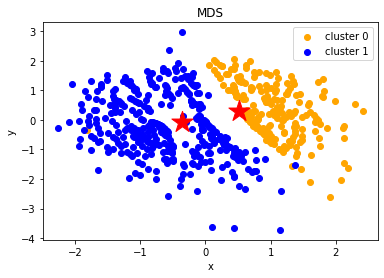

In [67]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

Apply t-SNE 

In [68]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


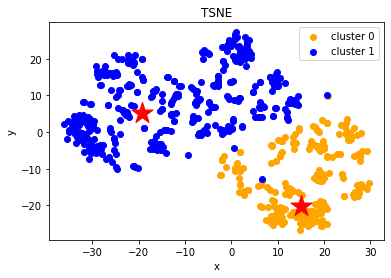

In [69]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [0]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [71]:
df.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0.000000,1.084523,1.058140,0.75,1,1,0,0,0,0,0,0,0,1,1,0.841086,1
1,0.333333,0.925883,1.047319,0.75,1,1,0,1,0,0,0,0,0,0,0,0.871711,1
2,0.000000,0.683858,0.635920,0.75,1,1,0,1,0,1,0,0,0,1,1,0.385189,1
3,0.000000,0.608992,1.002824,0.75,1,1,0,1,0,0,0,1,0,1,1,0.717012,1
4,0.000000,1.101869,1.115650,0.75,1,1,0,0,0,0,0,0,0,1,1,0.860305,1


In [72]:
df.groupby('cluster').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,
0,0.248927,0.914184,1.078738,0.723498,0.871245,0.738197,0.025751,0.648069,0.008584,0.137339,0.042918,0.197425,1.0,0.000000,0.768240,0.851417
1,0.247594,0.918059,1.074684,0.707152,0.845144,0.832021,0.018373,0.648294,0.002625,0.131234,0.057743,0.230971,0.0,0.530184,0.637795,0.869577


# Setting k to a larger value
